In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

sns.set(style="darkgrid")

# disable warings
import warnings
warnings.filterwarnings('ignore')

In [5]:
exp = 'xval'

In [6]:
path_to_data = '../recipes/acoustic_echo_retrieval/results/'+ exp + '/'
files = glob(path_to_data + '*.csv')
results = pd.DataFrame()
for file in files:
    res = pd.read_csv(file)
    results = results.append(res, ignore_index=True)
    print(file)

../recipes/acoustic_echo_retrieval/results/xval/aer_crocco.csv


In [7]:
results

,Unnamed: 0,dataset,data,n_mics,target,thr_smpl,lambda,mean_f,mean_p,mean_r,mean_e
0,0,11000,synt,2.0,0.0,1.0,0.005,0.090909,0.125000,0.071429,0.862579
1,1,11000,synt,2.0,0.0,1.0,0.010,0.090909,0.125000,0.071429,0.862579
2,2,11000,synt,2.0,0.0,1.0,0.020,0.100000,0.166667,0.071429,0.862579
3,3,11000,synt,2.0,0.0,1.0,0.050,0.125000,0.500000,0.071429,0.862579
4,4,11000,synt,2.0,0.0,3.0,0.005,0.272727,0.375000,0.214286,1.125429
...,...,...,...,...,...,...,...,...,...,...,...
283,283,11111,real,2.0,3.0,3.0,0.050,0.090909,0.125000,0.071429,0.975857
284,284,11111,real,2.0,3.0,5.0,0.005,0.090909,0.125000,0.071429,0.000000
285,285,11111,real,2.0,3.0,5.0,0.010,0.181818,0.250000,0.142857,4.005413
286,286,11111,real,2.0,3.0,5.0,0.020,0.181818,0.250000,0.142857,4.005413


In [9]:
# check values
print(pd.unique(results.loc[:, 'dataset']))
print(pd.unique(results.loc[:, 'n_mics']))
print(pd.unique(results.loc[:, 'target']))
print(pd.unique(results.loc[:, 'thr_smpl']))
print(pd.unique(results.loc[:, 'data']))
print(pd.unique(results.loc[:, 'lambda']))

[11000 11110 11111]
[2.]
[0. 1. 2. 3.]
[1. 3. 5.]
['synt' 'real']
[0.005 0.01  0.02  0.05 ]


In [12]:
def my_barplot(loc_res):
    sns.set(font_scale=1.2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

    loc_res = loc_res.replace('real', value='measured')
    loc_res = loc_res.replace('synt', value='synthetic')

    ax1 = sns.barplot(x='data', y='mean_p', hue='dataset', data=loc_res, ax=ax1)
    ax1.set(ylabel=r'Precision [%] $\rightarrow$', xlabel='')

    ax2 = sns.barplot(x='data', y='mean_e', hue='dataset', data=loc_res, ax=ax2)
    ax2.set(ylabel=r'$\leftarrow \mathtt{RMSE}$', xlabel='')
    ax2.legend_.remove()

    # plt.legend(bbox_to_anchor=(1.05, .7), loc=9, borderaxespad=0.)

    plt.tight_layout()
    # plt.savefig('../recipes/acoustic_echo_retrieval/results.pdf', dpi=300)

    plt.show()


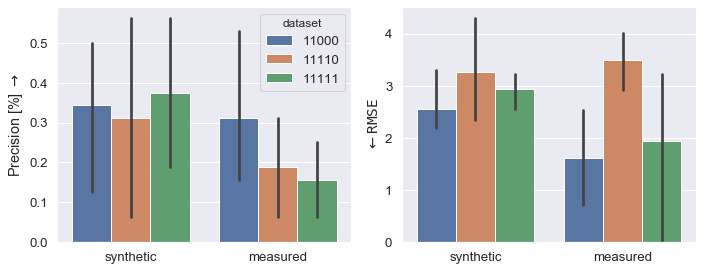

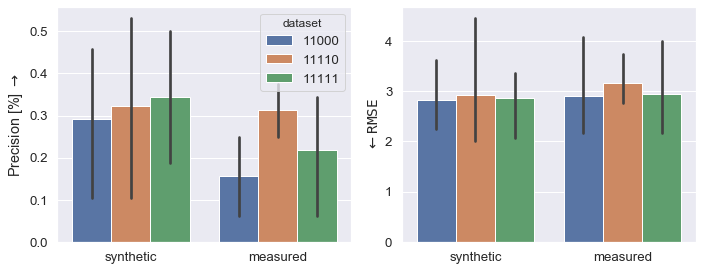

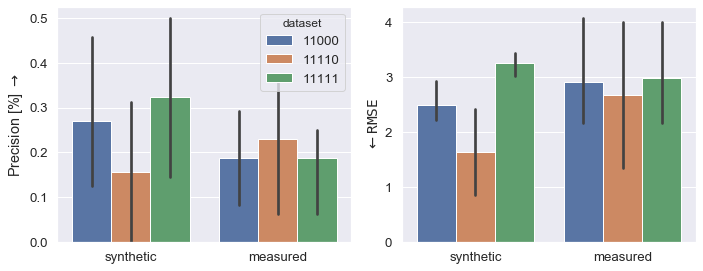

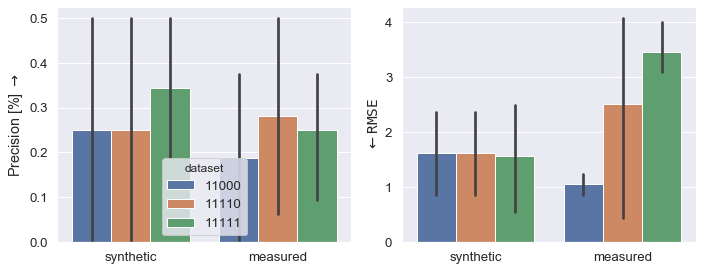

In [17]:
loc_res = results.loc[
      (results['thr_smpl']==5)
    & (results['lambda']==0.005)
]
my_barplot(loc_res)

loc_res = results.loc[
      (results['thr_smpl']==5)
    & (results['lambda']==0.01)
]
my_barplot(loc_res)

loc_res = results.loc[
      (results['thr_smpl']==5)
    & (results['lambda']==0.02)
]
my_barplot(loc_res)

loc_res = results.loc[
      (results['thr_smpl']==5)
    & (results['lambda']==0.05)
]
my_barplot(loc_res)